In [6]:
import pandas as pd

df = pd.read_csv(
    'https://raw.githubusercontent.com/zcolley/cs381-MatthewFried/main/quiz/diamonds.csv')



# df.count()
# df.dtypes
# df.describe()
# first_col = df.iloc[:,0]
# print(first_col)
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Part one Data Summary
The data set provides 53940 use cases about diamonds. They are eleven attributes. They are int type, float type, and object type. Those attributes are regarding diamond Specification. Those are carat,depth,table,prince,x,y and z.

# Part two EDA
##### carat
The mean of the carat column is 0.797940, the min of the carat column is 0.2, and the max of the carat column is 5.01.

##### depth
The mean of the depth column is 61.749405, the min of the depth column is 43.0, and the max of the depth column is 79.

##### table
The mean of the table column is 57.45, the min of the table column is 43.0, and the max of the table column is 95.

##### price
The mean of the price column is 3932.79, the min of the price column is 326.00, and the max of the price column is 18823.0.
##### x and y are dimensions
The mean of two columns is 5.73, the min of two columns is 0, the max for x column is 10.74, and the max for y column is 58.9.


##### information
carat is the weight of a diamond. 

Diamond's Depth is calculated by dividing the height of the diamond by the diamonds' width. The depth of a diamond is important because it will affect how much light is reflected back to observer. An ideal depth will reflect most of the light that comes into the diamond.
The ideal depth for a round diamond should be less than 63.5%, the ideal depth for a princess diamond should be less than 78% ,and the rest diamond should be less than 70%.

Diamond's table is important because it allows the optimal amount of light into a diamond, creating a beautiful sparkle. This does not mean a bigger table size is always good. The ideal table size is depending on the shape of a diamond. The table size is calculated by dividing the table width by the diameter. The ideal table ratio for a round diamond should be around 53 to 62.5%, a princess shape diamond should be around 53 to 75%.



In [ ]:
df.describe()

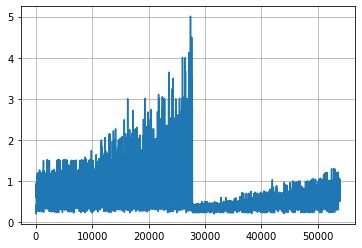

In [9]:
import matplotlib.pylab as plt
x = df.iloc[:,0]
y_axis = df['carat'].tolist()
plt.plot(x, y_axis)
321
plt.grid()
plt.show()